In [ ]:
!pip install rdkit

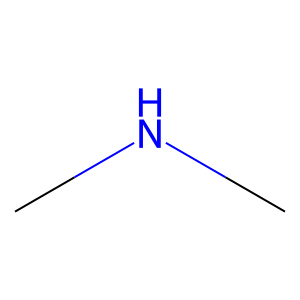

In [63]:
import os

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
import pandas as pd

mol=Chem.MolFromSmiles('CNC')
Draw.MolToImage(mol)

In [48]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
!ls "/content/drive/My Drive/Datasets_MolBio"
path_sdf='/content/drive/My Drive/Datasets_MolBio/sdf_dataset.sdf'
path_csv='/content/drive/My Drive/Datasets_MolBio/smi_dataset.csv'
path_smi='/content/drive/My Drive/Datasets_MolBio/smi_dataset.smi'


sdf_dataset.sdf  smi_dataset.csv  smi_dataset.smi


In [80]:
#Sanitizing
def sanitize_mol(mol):
    """Try to sanitize a molecule, return None if invalid."""
    if mol is None:
        return None
    try:
        AllChem.SanitizeMol(mol)
        return mol
    except:
        return None

if os.path.exists(path_sdf):
    s_mols = [sanitize_mol(mol) for mol in Chem.SDMolSupplier(path_sdf, sanitize=False)]
    s_mols = [mol for mol in s_mols if mol is not None]  # keep only valid
    print(f"SDF: Loaded {len(s_mols)} valid molecules")
else:
    print(f"SDF file not found: {path_sdf}")

SDF: Loaded 4 valid molecules


[07:25:56] Explicit valence for atom # 2 N, 4, is greater than permitted


And this is not only in reading structures.
It can be performed outside reading molecules.
But basically they are usually performed in the beginning of creating a molecule or reading molecule. And again the idea of sanitization is that to check the molecule for chemical correctness.

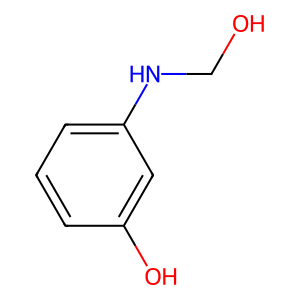

In [81]:
img_mol=s_mols[0] #first valid molecule
Draw.MolToImage(img_mol)

###Read CSV


In [30]:
#Parsing CSV with pandas
if os.path.exists(path_csv):
    df = pd.read_csv(path_csv)
    print("CSV columns:", df.columns)

    # Replace 'SMILES' with actual column name if different
    smiles_col = 'SMILES' if 'SMILES' in df.columns else df.columns[0]

    valid_mols = []
    invalid_smiles = []

    for smi in df[smiles_col]:
        mol = Chem.MolFromSmiles(smi, sanitize=False)
        mol = sanitize_mol(mol)
        if mol:
            valid_mols.append(mol)
        else:
            invalid_smiles.append(smi)

    print(f"CSV: Loaded {len(valid_mols)} valid molecules")
    print(f"Invalid SMILES ({len(invalid_smiles)}): {invalid_smiles}")
else:
    print(f"CSV file not found: {path_csv}")

Index(['SMILES', 'Name', 'Activity', 'Unnamed: 3'], dtype='object')
Loaded 4 valid molecules
Valid SMILES[<rdkit.Chem.rdchem.Mol object at 0x7c695db2adc0>, <rdkit.Chem.rdchem.Mol object at 0x7c695a5c1a80>, <rdkit.Chem.rdchem.Mol object at 0x7c695a3a8ac0>, <rdkit.Chem.rdchem.Mol object at 0x7c695a3a8d60>]

Invalid SMILES (1): ['CN(C)(C)CO']


[06:54:06] Explicit valence for atom # 1 N, 4, is greater than permitted


###Read SMILES

SMILES (Simplified Molecular Input Line Entry System) is a string notation for representing molecules, where atoms and bonds are encoded as characters.
Encodes the connectivity (2D graph) of the molecule — which atoms are connected and how.


In [92]:
if os.path.exists(path_smi):
    # Using SmilesMolSupplier
    smi_mols = Chem.SmilesMolSupplier(path_smi, sanitize=False)
    valid_mols = []
    invalid_smiles = []

    for mol in smi_mols:
        if mol is not None:
            try:
                Chem.SanitizeMol(mol)  # try sanitization
                valid_mols.append(mol)
            except Exception:
                invalid_smiles.append(mol)  # could also log SMILES separately
        else:
            invalid_smiles.append(None)

    print(f"SmilesMolSupplier: {len(valid_mols)} valid molecules")
    print(f"Skipped {len(invalid_smiles)} invalid molecules")

    print([v_mol for v_mol in valid_mols])
    Draw.MolToImage(valid_mols[0])  # preview first molecule

    #Read raw lines for reference
    with open(path_smi, 'r') as f:
        smiles_lines = [line.strip() for line in f if line.strip()]
    print("Raw SMILES lines:", smiles_lines)

else:
    print(f"SMI file not found: {path_smi}")

SmilesMolSupplier: 4 valid molecules
Skipped 1 invalid molecules
[<rdkit.Chem.rdchem.Mol object at 0x7c695a3a8ac0>, <rdkit.Chem.rdchem.Mol object at 0x7c695a26f0d0>, <rdkit.Chem.rdchem.Mol object at 0x7c695db2adc0>, <rdkit.Chem.rdchem.Mol object at 0x7c695a1b27a0>]
Raw SMILES lines: ['SMILES Name', 'OCNC1=CC=CC(O)=C1 Molecule_1', 'NCCC1CC1 Molecule_2', 'CN(C)(C)CO Molecule_3', 'CCN1CCCCC1 Molecule_4', 'C1=CC=C(CCC2CN2)C=C1 Molecule_5']


[07:33:08] Explicit valence for atom # 1 N, 4, is greater than permitted


###Writing to SDF file


In [97]:
if os.path.exists(path):
    # Load molecules
    mols = Chem.SDMolSupplier(path)
    mols = [mol for mol in mols if mol]  # keep only valid molecules
    print(f"Number of valid molecules: {len(mols)}")

    # Write to new SDF
    output_path = 'new_sdf.sdf'
    sdf_writer = Chem.SDWriter(output_path)
    for mol in mols:
        sdf_writer.write(mol)
    sdf_writer.close()
    print(f"Saved {len(mols)} molecules to {output_path}")

else:
    print(f"SDF file not found: {path}")


Number of valid molecules: 4
Saved 4 molecules to new_sdf.sdf


[07:36:04] Explicit valence for atom # 2 N, 4, is greater than permitted
[07:36:04] ERROR: Could not sanitize molecule ending on line 60
[07:36:04] ERROR: Explicit valence for atom # 2 N, 4, is greater than permitted
